In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import model_parameters as MP
import numpy as np
import networkx as nx
from networkx.algorithms.centrality import betweenness_centrality as BC
from networkx.algorithms.centrality import degree_centrality as DC
import matplotlib.pyplot as plt
from experiment.network_generator import gen_network
import pandas as pd
import networkx.algorithms.centrality as nxac


In [2]:
def max_degree(grph):
    nn = max(grph.degree, key=lambda x: x[1])
    grph.remove_node(nn[0])
    return nn[0]

def max_degree_b(grph, seen, f):
    if f is not None:
        max_val = max(grph.degree, key=lambda x: x[1])[1]
        nns = [n for n in grph.degree if n[1] == max_val]
        nns_ = [n for n in nns if n[0] not in seen]
        if len(nns_)>0:
            ec = nxac.betweenness_centrality(grph)
            nn = min(nns_, key=lambda x: ec[x[0]])
        else:
            ec = nxac.betweenness_centrality(grph)
            nn = min(nns, key=lambda x: ec[x[0]])
    else:
        nn = (f,0)
    neighbors = grph.neighbors(nn[0])
    grph.remove_node(nn[0])
    seen |= set(list(neighbors))
    return (nn[0], seen)

def sort_nodes_to_inc_span(grph):
    head=list()
    seen = set()
    sp = [0, 1, 2, 6, 8, 9, 10, 11, 12, 15, 20, 22, 28, 34, 45]
    for i in range(len(grph.degree)):
        if i<len(sp):
            elem, seen = max_degree_b(grph, seen, f=sp[i])
        else:
            elem, seen = max_degree_b(grph, seen, f=None)
        head.append(elem)
    return head


9 :> 3


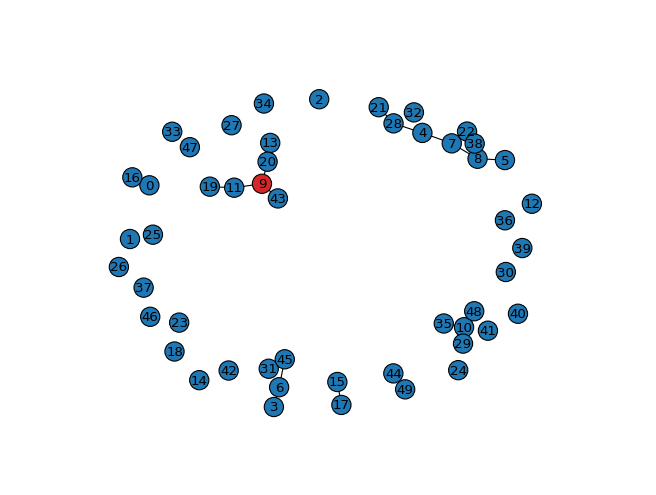

10 :> 3


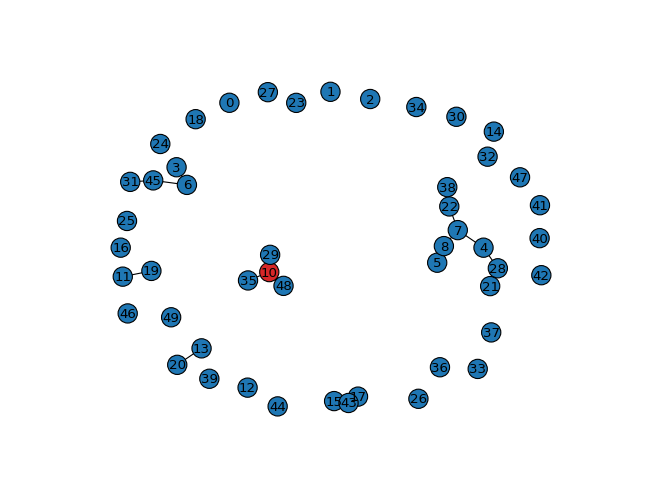

6 :> 2


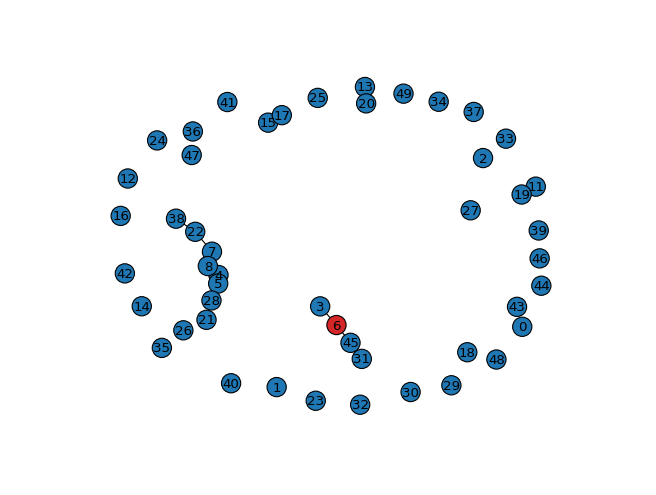

8 :> 2


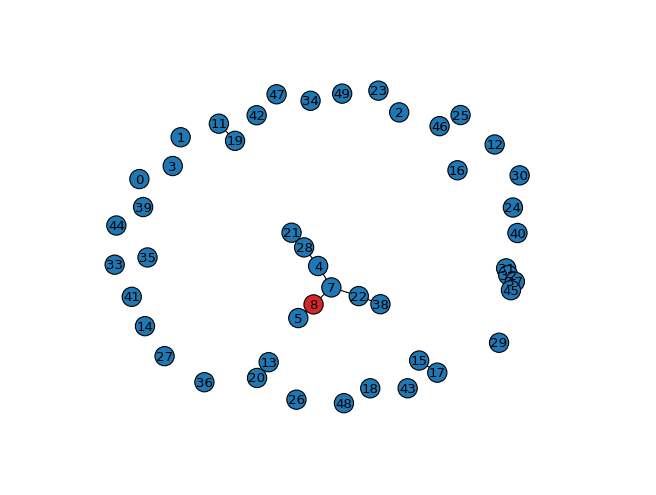

11 :> 1


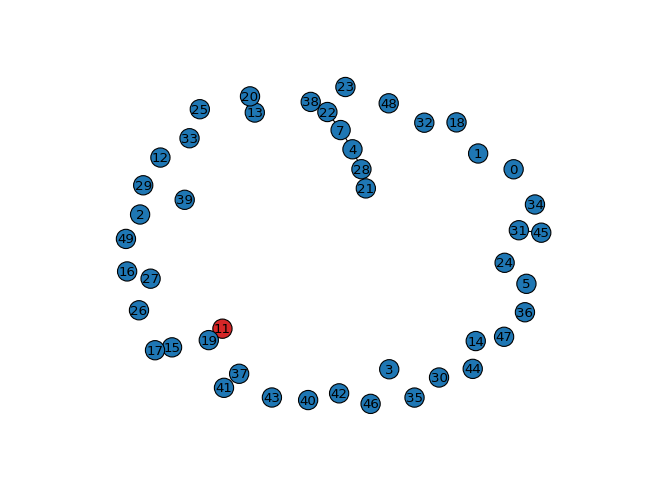

20 :> 1


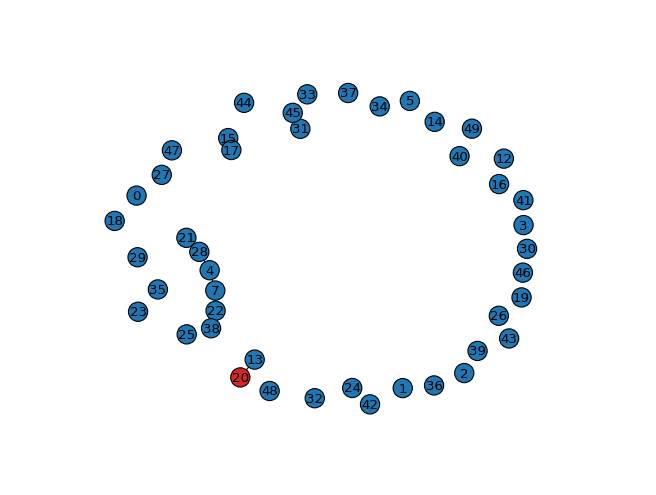

22 :> 2


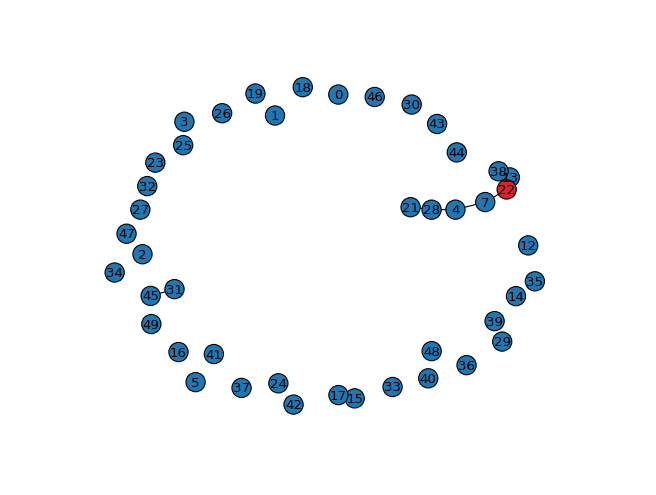

28 :> 2


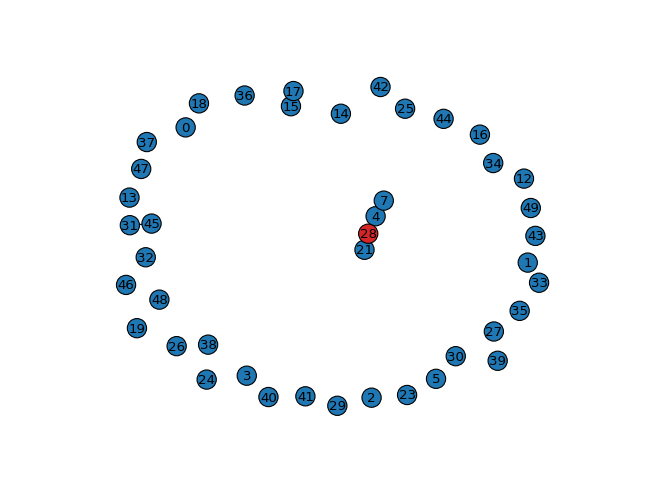

45 :> 1


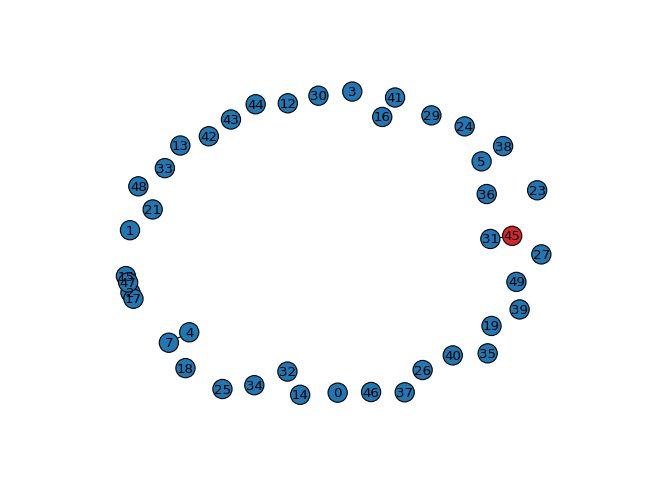

15 :> 1


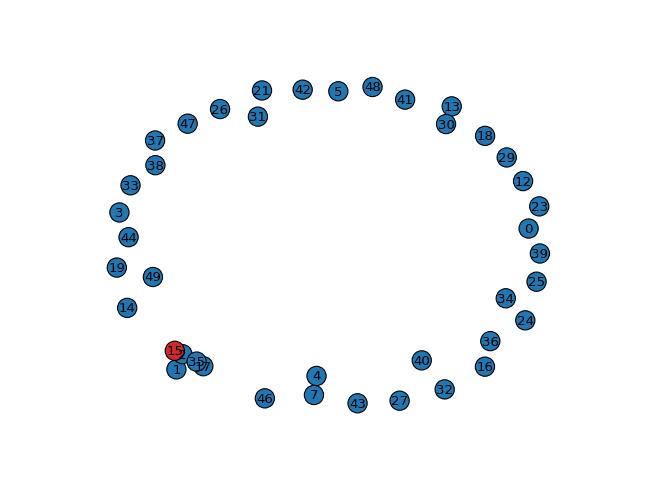

0 :> 0


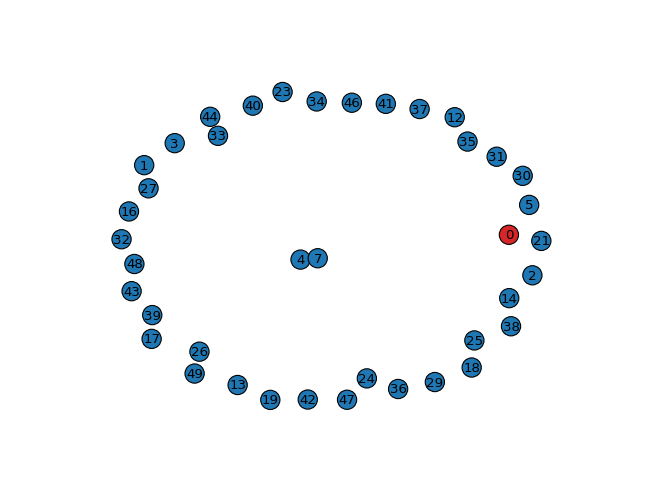

1 :> 0


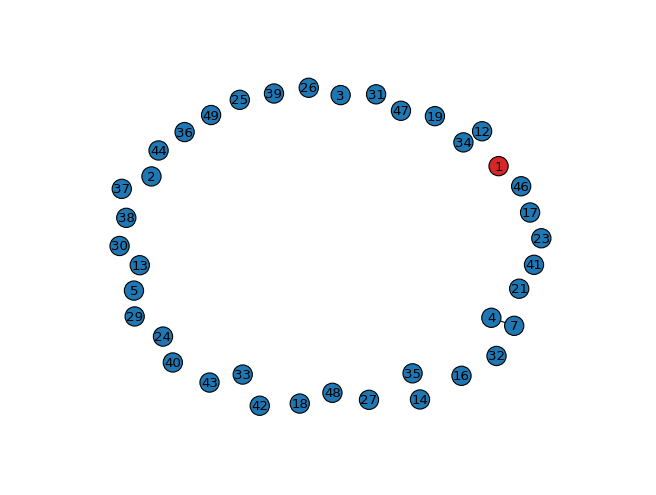

2 :> 0


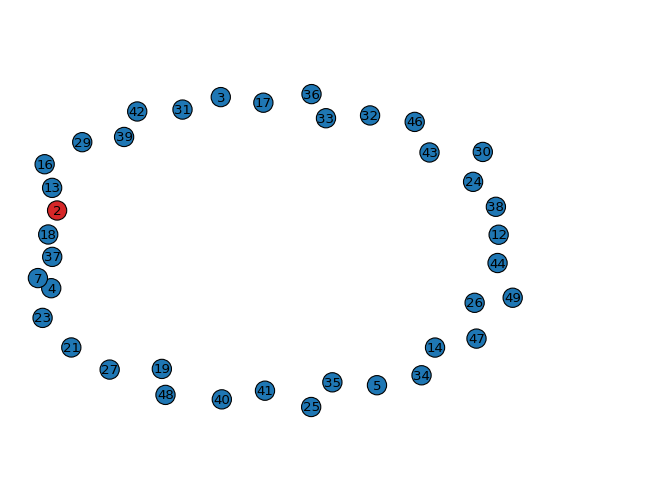

12 :> 0


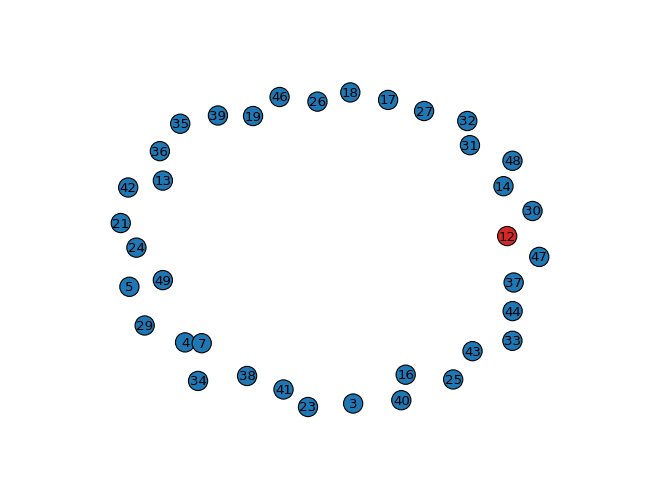

34 :> 0


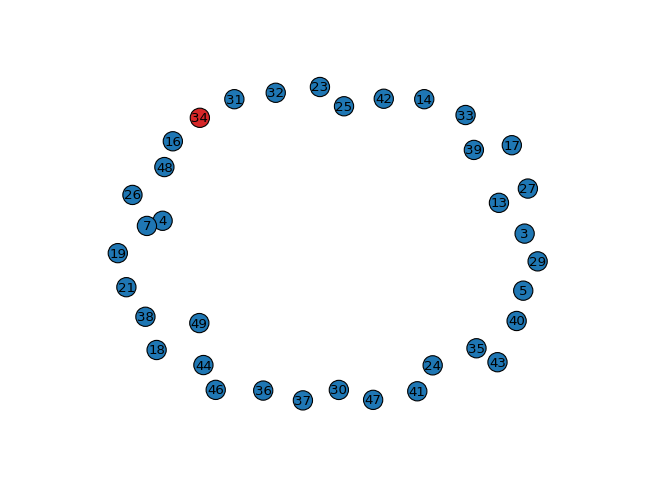

In [37]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.9)
plt.style.use('classic')
sp = [0, 1, 2, 6, 8, 9, 10, 11, 12, 15, 20, 22, 28, 34, 45]
for i,p in enumerate(sorted(sp, key=lambda b: -g.degree[b])):
    colors = ['tab:red' if nd == p  else 'tab:blue' for nd in g.nodes]
    nx.draw(g, node_color=colors, pos=nx.fruchterman_reingold_layout(g, k=1/4), with_labels=True)
    print(p,":>", g.degree[p])
    g.remove_node(p)
    plt.show()

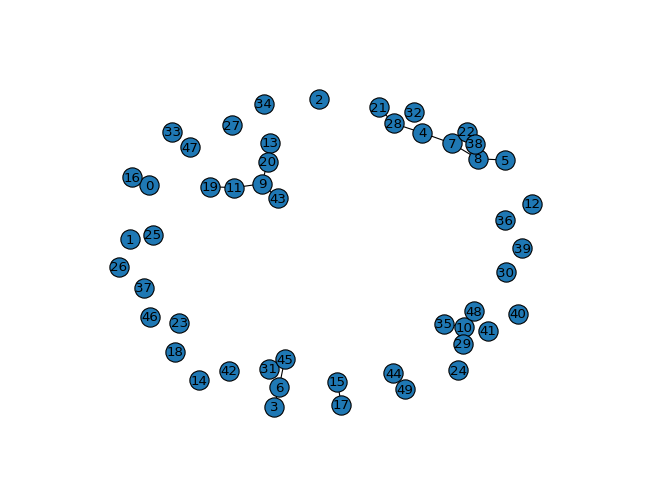

NetworkXError: The node None is not in the graph.

In [7]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.90)
plt.style.use('classic')
nx.draw(g, pos=nx.spring_layout(g, k=1/4), with_labels=True)
plt.show()
print(sort_nodes_to_inc_span(g))

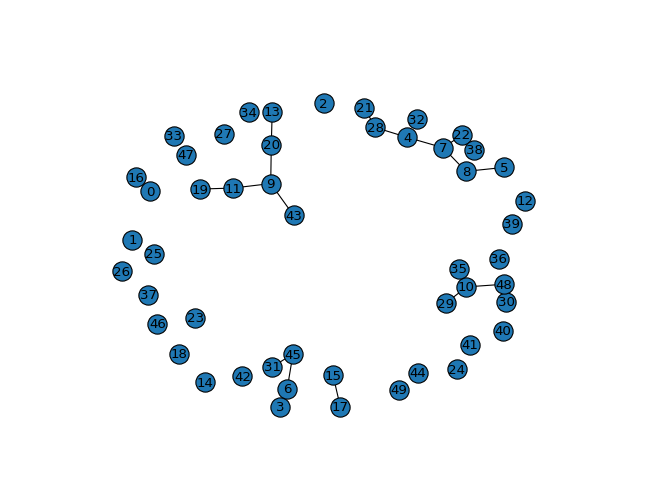

In [41]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.90)
plt.style.use('classic')
nx.draw(g, pos=nx.fruchterman_reingold_layout(g, k=1/3), with_labels=True)
plt.show()
ec = nxac.eigenvector_centrality_numpy(g)
dc = nxac.degree_centrality(g)
nodes_cent = pd.DataFrame(data=[(k1,v1,v2) for ((k1,v1),(_,v2)) in zip(ec.items(), dc.items())], columns=['node','eigenvalue','degree'])

In [1]:
nodes_cent.sort_values(by=["degree", "eigenvalue"], ascending=[False, True])

NameError: name 'nodes_cent' is not defined

In [17]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.9)
plt.style.use('classic')
np.random.seed(1)
X_u = np.random.choice([0,1],(50))
g.degree[0]*X_u[0]
dd = {gd[0]:gd[1]*X_u[gd[0]] for gd in g.degree}
dd

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 1,
 6: 2,
 7: 3,
 8: 2,
 9: 0,
 10: 0,
 11: 2,
 12: 0,
 13: 1,
 14: 0,
 15: 0,
 16: 0,
 17: 1,
 18: 0,
 19: 0,
 20: 0,
 21: 1,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 2,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 1,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 0,
 45: 2,
 46: 0,
 47: 0,
 48: 1,
 49: 0}